# Writing your first Immediate Mode application

Let's start by creating a simple application "Hello, World" application, where we will demonstrate several aspects of ImGui and Hello ImGui.

## Step 1: Hello, World!

We will start by displaying a text and an image in the application window, with the following steps:
1. We define a gui function that will be called by Hello ImGui at every frame: It will display the GUI of our application *and* handle user events.
2. We use the `imgui.text()` function to display a text in the window.
3. We use `hello_imgui.im_texture_id_from_asset()` to load an image from an asset file, and `imgui.image()` to display it, with a size of 100x100 pixels.
4. We call `hello_imgui.run()` to start the application, optionally specifying the window title and size.


Notes: 
- Dear ImGui is not able to load images by itself, so we use Hello ImGui's `image_from_asset()` function to load and display an image. 
- The image will either be loaded from a path relative to the assets folder, or via a full path provided as an argument to `image_from_asset()`.

TODO: link to more info about assets handling

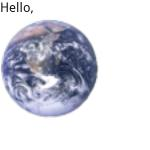

In [44]:
from imgui_bundle import imgui, hello_imgui, ImVec2

def gui():                                                                  # 1.
    # Display a label saying "Hello, "
    imgui.text("Hello, ")                                                   # 2.

    # Display an image from the "assets/" folder
    texture_id = hello_imgui.im_texture_id_from_asset("images/world.png")   # 3.
    imgui.image(texture_id, ImVec2(100, 100))                               # 3.


hello_imgui.run(gui, window_title="Hello, World!", window_size=(150, 150))  # 4.

```cpp
#include "imgui.h"
#include <hello_imgui/hello_imgui.h>

void Gui() {                                                                // 1.
    // Display a label saying "Hello,"
    ImGui::Text("Hello, ");                                                 // 2.

    // Display an image from the "assets/" folder
    auto texture_id = HelloImGui::ImTextureIdFromAsset("images/world.png"); // 3.
    ImGui::Image(texture_id, ImVec2(100, 100));                             // 3.
}

int main() { HelloImGui::Run(Gui, "Hello, World!", 800, 600); }             // 4.
```

## Step 2: Handling button clicks

We will add some buttons to the application, and handle the click events, with the following steps:

1. Add an AppState class to store the state of the application. This is a recommended best practice, as it allows to separate the GUI code from the business logic.
2. Add a counter to the AppState. This counter will be incremented each time a button is clicked.
3. Let the gui function take an AppState as an argument (and possibly modify it).
4. Add a button to the GUI, with `imgui.button()`, and increment the counter when the button is clicked.
5. Add a tooltip to the button, to display a message when the user hovers over it.
6. Add a button to exit the application (see note below).
7. Create a main() function to run the application, where we create an AppState object
8. Create a lambda function to call the gui function with the AppState object as an argument.
9. Call `hello_imgui.run()` with the lambda function as an argument.

*Note: In the case of a web application, such as in this tutorial, the "exit" button will not have any effect. In the case of a desktop application, it will close the window.*

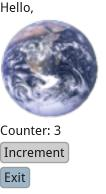

In [46]:
from imgui_bundle import imgui, hello_imgui, ImVec2

class AppState:                                               # 1.
    counter: int = 0                                          # 2.

def gui(app_state: AppState):                                 # 3.
    # Step 1: Display a label and an image
    imgui.text("Hello, ")
    texture_id = hello_imgui.im_texture_id_from_asset("images/world.png")
    imgui.image(texture_id, ImVec2(100, 100))

    # Step 2: Display the counter, and a button to increment it
    imgui.text(f"Counter: {app_state.counter}")
    if imgui.button("Increment"):                             # 4.
        app_state.counter += 1
    imgui.set_item_tooltip("Click to increment the counter")  # 5.

    if imgui.button("Exit"):
        hello_imgui.get_runner_params().app_shall_exit = True # 6.

def main():                                                   # 7.
    app_state = AppState()                                    # 7.
    gui_fn = lambda: gui(app_state)                           # 8.
    hello_imgui.run(gui_fn)                                   # 9.

if __name__ == "__main__":                                    # 7.
    main()                                                    # 7.

```cpp
#include "imgui.h"
#include <hello_imgui/hello_imgui.h>

class AppState {                                                // 1.
public:
    int counter = 0;                                            // 2.
};


void Gui(AppState& appState) {                                  // 3.
    // Step 1: Display a label and an image
    ImGui::Text("Hello, ");
    auto texture_id = HelloImGui::ImTextureIdFromAsset("images/world.png");
    ImGui::Image(texture_id, ImVec2(100, 100));

    // Step 2: Display the counter and a button to increment it
    ImGui::Text("Counter: %d", appState.counter);
    if (ImGui::Button("Increment")) {                           // 4.
        appState.counter++;
    }
    ImGui::SetItemTooltip("Click to increment the counter");    // 5.

    if (ImGui::Button("Exit")) {                                // 6.
        HelloImGui::GetRunnerParams()->appShallExit = true;
    }
}

int main() {
    AppState appState;                                          // 7.
    auto gui_fn = [&]() { Gui(appState); }; // 8.
    HelloImGui::Run(gui_fn, "Handling Button Clicks", false, false, {400, 300}); // 9.
}
```

## Step 3: Using widgets to edit values 

We will now add a slider to the application, to allow the user to set the size of the globe, with the following steps:

We will:
1. Add a `globe_size` field to the AppState class, to store the size of the globe. We will use [em units](https://en.wikipedia.org/wiki/Em_(typography)) to store this size so that our rendering is independent of the screen resolution and scaling.
2. Compute the size in pixel by either multiplying by `imgui.get_font_size()` or by using `hello_imgui.em_size` / `hello_imgui.em_to_vec2` (see [Hello ImGui doc / DPI handling](https://pthom.github.io/hello_imgui/book/doc_api.html#place-widgets-in-a-dpi-aware-way)
3. Use `hello_imgui.image_from_asset()` (which is a combination of `im_texture_id_from_asset()` and `imgui.image()`) to display the image with the computed size.
4. Display a slider with `imgui.slider_float()` to allow the user to set the globe size. 
5. Set the slider width to a reasonable value (by default, it would occupy the full width of the window).


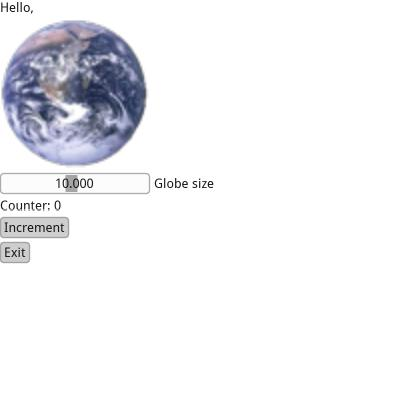

In [47]:
from imgui_bundle import imgui, hello_imgui, ImVec2

class AppState:
    counter: int = 0
    globe_size: float = 10.0  # (in em units)                                # 1.

def gui(app_state: AppState):  # 3.
    # Step 1: Display a label saying "Hello, "
    imgui.text("Hello, ")

    # Step 3:
    # ------
    # Compute the size of the globe in pixels                                 # 2.
    # We can either use hello_imgui.em_size 
    size_pixel = hello_imgui.em_size(app_state.globe_size)                    # 2.
    # or we can multiply by imgui.get_font_size()
    size_pixel = imgui.get_font_size() * app_state.globe_size                 # 2.
    # We pass a size (app_state.globe_size, 0) to `image_from_asset`, 
    #    where (0 means keep the aspect ratio)
    hello_imgui.image_from_asset("images/world.png", ImVec2(size_pixel, 0))   # 3.

    # Display a slider to change the globe size                               # 4.
    # -----------------------------------------
    # Set the width of the next item to 10 em units
    imgui.set_next_item_width(hello_imgui.em_size(10))                        # 5.
    # Display a slider to change the globe size
    # In Python, ImGui widgets often return a tuple of (value_changed: bool, new_value: ...), 
    # hence we store the first element of the tuple in a variable called _changed, 
    # and the second element in app_state.globe_size
    #
    # Note: This is specific to Python bindings. 
    #       In C++, the return value of ImGui::SliderFloat would be a single bool 
    #       and it would modify the globe_size variable directly (passed by pointer).
    #       The equivalent C++ code would be:
    #            bool changed = ImGui::SliderFloat(
    #                                "Globe size", &globe_size, 1.0, 20.0);
    _changed, app_state.globe_size = imgui.slider_float("Globe size", app_state.globe_size, 1.0, 20.0)

    # Step 2: Display the counter, and a button to increment it
    imgui.text(f"Counter: {app_state.counter}")
    if imgui.button("Increment"):
        app_state.counter += 1
    imgui.set_item_tooltip("Click to increment the counter")

    if imgui.button("Exit"):
        hello_imgui.get_runner_params().app_shall_exit = True

def main():
    app_state = AppState()
    gui_fn = lambda: gui(app_state)
    hello_imgui.run(gui_fn, window_title="Hello, World!", window_size=(420, 420))

if __name__ == "__main__":
    main()

```cpp
#include "imgui.h"
#include <hello_imgui/hello_imgui.h>

// 1. Define the AppState class
class AppState {
public:
    int counter = 0;        // Counter
    float globe_size = 10.0f; // Globe size (in em units)                   // 1.
};

// 3. Define the GUI function, taking AppState as an argument
void Gui(AppState& app_state) {
    // Step 1: Display a label saying "Hello, "
    ImGui::Text("Hello, ");

    // Step 3:
    // ------
    // Compute the size of the globe in pixels                             // 2.
    // We can either use HelloImGui::EmSize
    float size_pixel = HelloImGui::EmSize(app_state.globe_size);           // 2.
    // Or we can multiply by ImGui::GetFontSize()
    size_pixel = ImGui::GetFontSize() * app_state.globe_size;              // 2.

    // We pass a size (app_state.globe_size, 0) to ImGui::Image,
    // where (0 means keep the aspect ratio)
    HelloImGui::ImageFromAsset("images/world.png", ImVec2(size_pixel, 0)); // 3.

    // Step 4: Display a slider to change the globe size                   // 4.
    // -----------------------------------------
    // Set the width of the next item to 10 em units
    ImGui::SetNextItemWidth(HelloImGui::EmSize(10));                       // 5.
    // Display a slider to change the globe size
    // In C++, the return value of ImGui::SliderFloat is a single bool,
    // and it modifies the globe_size variable directly (passed by pointer).
    bool changed = ImGui::SliderFloat("Globe size",                       // 5.
                                      &app_state.globe_size, 1.0f, 20.0f);

    // Step 2: Display the counter, and a button to increment it
    ImGui::Text("Counter: %d", app_state.counter);
    if (ImGui::Button("Increment")) {
        app_state.counter++;
    }
    ImGui::SetItemTooltip("Click to increment the counter");

    // Add a button to exit
    if (ImGui::Button("Exit")) {
        HelloImGui::GetRunnerParams()->appShallExit = true;
    }
}

int main() {
    AppState app_state;
    auto gui_fn = [&]() { Gui(app_state); };
    HelloImGui::Run(gui_fn, "Hello, World!", false, false, {420, 420});      // 9.
}

```

## Step 4: Polish the application layout

We will now polish the layout of the application, with the following steps:

1. Import the `imgui_ctx` module from Hello ImGui, which provides context managers to control the layout of the application.
2. Use `with imgui_ctx.begin_vertical()` and `with imgui_ctx.begin_horizontal()` to specify sections where we want to display widgets vertically or horizontally. This will allow us to better control the layout of the application. 
3. We can use `imgui.spring()` to add some space between widgets. A spring is a flexible space that will expand to fill the available space.
4. Use `imgui.same_line()` to display the next widget on the same line.
5. Use `imgui.separator()` and `imgui.separator_text()` to add a horizontal line between widgets.

Notes: 
* there are **many** other ways to control the layout of the application, such as `imgui.columns()`, `imgui.begin_group()`, `imgui.tree_node()`, etc. See the layout section of the [Dear ImGui Manual](https://pthom.github.io/imgui_manual_online/manual/imgui_manual.html)
* `imgui.begin_horizontal()` and `imgui.begin_vertical()` are not part of the original ImGui API, but are taken from [this PR](https://github.com/ocornut/imgui/pull/846)

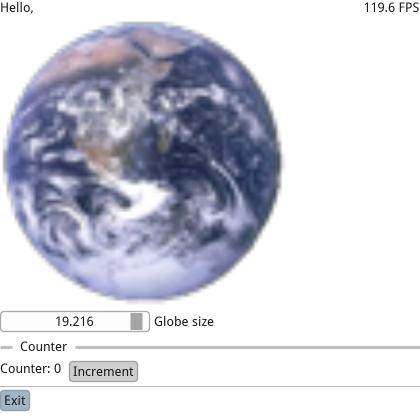

In [43]:
from imgui_bundle import imgui, hello_imgui, ImVec2, imgui_ctx                    # 1.

class AppState:
    counter: int = 0
    globe_size: float = 10.0  # (in em units)

def display_frame_rate():
    # Display the frame rate, with an indication if the application is idling 
    # (by default, Hello ImGui apps will idle after 3 seconds of inactivity)
    imgui.text(f"{hello_imgui.frame_rate(): .1f} FPS")
    if hello_imgui.get_runner_params().fps_idling.is_idling:
        imgui.text("(Idling)")

def gui(app_state: AppState):
    # The main window is displayed in a vertical layout                           # 2.
    # Note: it is important to surround `begin_horizontal` in a `begin_vertical`,
    #       if you want to use `spring` to push widgets to the right.
    with imgui_ctx.begin_vertical("main"):
        # And its first row is displayed in a horizontal layout                   # 2.
        # which displays the text "Hello, " and the frame rate
        with imgui_ctx.begin_horizontal("first_row"):
            imgui.text("Hello, ")
            # Add a spring to push the frame rate to the right
            imgui.spring()                                                        # 3.
            display_frame_rate()

        # Step 3: Display a resizable globe
        size_pixel = hello_imgui.em_size(app_state.globe_size)
        hello_imgui.image_from_asset("images/world.png", ImVec2(size_pixel, 0))
        imgui.set_next_item_width(hello_imgui.em_size(10))
        _changed, app_state.globe_size = imgui.slider_float(
            "Globe size", app_state.globe_size, 1.0, 20.0)

        imgui.separator_text("Counter")                                           # 5.

        # Step 2: Display the counter, and a button to increment it
        imgui.text(f"Counter: {app_state.counter}")
        imgui.same_line()                                                         # 4.
        if imgui.button("Increment"):
            app_state.counter += 1
        imgui.set_item_tooltip("Click to increment the counter")

        imgui.separator()                                                         # 5.
        if imgui.button("Exit"):
            hello_imgui.get_runner_params().app_shall_exit = True

def main():
    app_state = AppState()
    gui_fn = lambda: gui(app_state)
    hello_imgui.run(gui_fn, window_title="Hello, World!", window_size=(420, 420))

if __name__ == "__main__":
    main()

```cpp
#include "imgui.h"
#include <hello_imgui/hello_imgui.h>

class AppState {
public:
    int counter = 0;
    float globe_size = 10.0f; // (in em units)
};

void DisplayFrameRate() {
    // Display the frame rate, with an indication if the application is idling
    // (by default, Hello ImGui apps will idle after 3 seconds of inactivity)
    ImGui::Text("%.1f FPS", HelloImGui::FrameRate());
    if (HelloImGui::GetRunnerParams()->fpsIdling.isIdling)
        ImGui::Text("(Idling)");
}

void gui(AppState& app_state)
{
    // In C++, you need to call ImGui::BeginVertical/ImGui::EndVertical,           // 1.
    //                     and  ImGui::BeginHorizontal/ImGui::EndHorizontal

    // The main window is displayed in a vertical layout                           // 2.
    // Note: it is important to surround `BeginHorizontal` in a `BeginVertical`,
    //       if you want to use `Spring` to push widgets to the right.

    ImGui::BeginVertical("main");                                                  // 2.

    {
        ImGui::BeginHorizontal("first_row");                                       // 2.
        ImGui::Text("Hello, ");
        ImGui::Spring();                                                           // 3.
        DisplayFrameRate();
        ImGui::EndHorizontal();                                                    // 2.
    }

    float size_pixel = HelloImGui::EmSize(app_state.globe_size);
    HelloImGui::ImageFromAsset("images/world.png", ImVec2(size_pixel, 0));
    ImGui::SetNextItemWidth(HelloImGui::EmSize(10));
    bool _changed = ImGui::SliderFloat("Globe size", &app_state.globe_size, 1.0f, 20.0f);

    ImGui::SeparatorText("Counter");                                               // 5.
    ImGui::Text("Counter: %d", app_state.counter);
    ImGui::SameLine();                                                             // 4.
    if (ImGui::Button("Increment")) {
        app_state.counter++;
    }
    ImGui::SetItemTooltip("Click to increment the counter");

    ImGui::Separator();                                                            // 5.
    if (ImGui::Button("Exit"))
        HelloImGui::GetRunnerParams()->appShallExit = true;

    ImGui::EndVertical();                                                         // 2.
}

int main() {
    AppState app_state;
    auto gui_fn = [&]() { gui(app_state); };
    HelloImGui::Run(gui_fn, "Hello, World!", false, false, {420, 420});
}
```